<a href="https://colab.research.google.com/github/nflorezasu/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

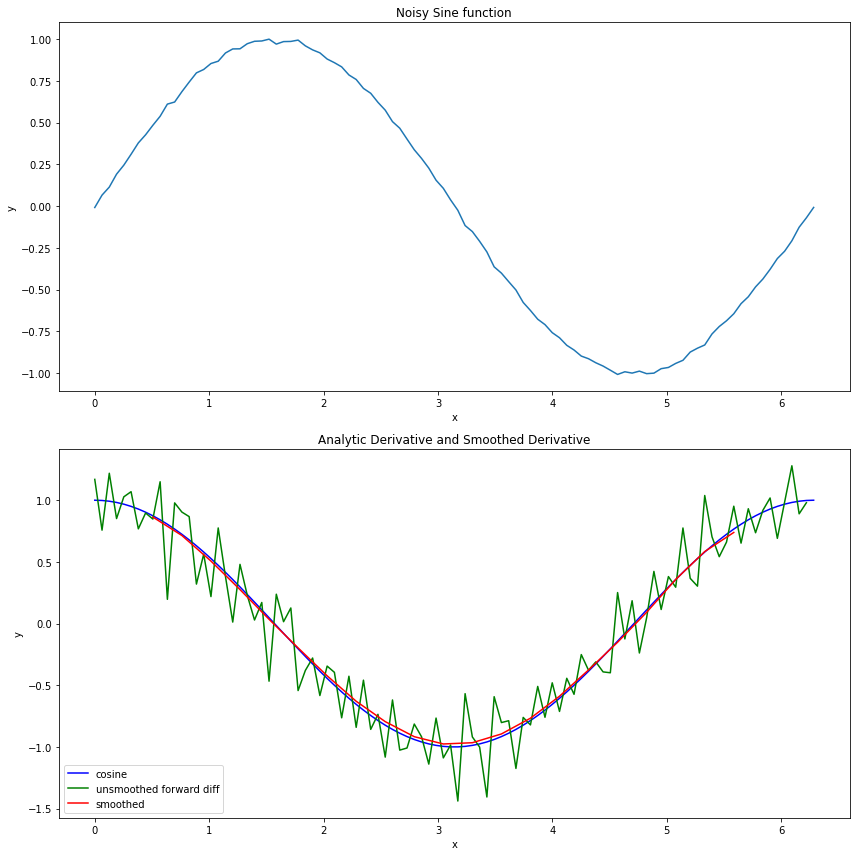

In [7]:
#MAT 421 Spring 2022
#Nickolas Florez
#Module F (Chap 20)

#Problem 3

import numpy as np
import matplotlib.pyplot as plt

def my_num_diff_w_smoothing(x, y, n):
    import numpy as np
    x_smooth = x[np.arange(n, len(x) - n, n)]
  #mean
    def smoothData(x, y, n):
        from numpy.lib.function_base import average
        discrete = np.arange(n + 1, len(y)-n, n)
        s = []
        for k in range(0, len(discrete)):
            i = discrete[k]
            s.append(average(y[np.arange(i-n-1, i+n)]))
        return np.array(s)
        #function to find the derivative of the given datapoint
        #using central difference derivation
    def central_difference(y, h):
        dy = []
        for i in range(1, len(y)-1):
            dy.append((y[i+1]-y[i-1])/(2*h))
        return np.array(dy)
    y_smooth = smoothData(x, y, n)
    X = x_smooth[np.arange(1, len(x_smooth)-1)]
    h = (X[len(X)-1] - X[0]) / (len(X)-1)
    dy = central_difference(y_smooth, h)

    return(dy, X)

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title("Noisy Sine function")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(212)
plt.plot(x, np.cos(x), "b", label = "cosine")
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), "g", \
label = "unsmoothed forward diff")
plt.plot(X, dy, "r", label = "smoothed")
plt.title("Analytic Derivative and Smoothed Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()